In [ ]:
import numpy as np
import pylab as pl
import pandas as pd

# **Reading/Importing Data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid_19_indonesia_time_series_all.csv", header=0)
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
del data['Name']
del data['Item']
del data['Kind']
del data['Hidden']

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-01-08,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN
1,2020-01-09,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33
2,2020-01-10,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00
3,2020-01-11,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00
4,2020-01-12,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00


# **Data Pre-processing**

Treating Missing Value

In [ ]:
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                16283
Province                         495
Country                            0
Continent                          0
Island                           495
Time Zone                        495
Special Status                 13890
Total Regencies                    0
Total Cities                     469
Total Districts                    0
Total Urban Villages             471
Total Rural Villages             496
Area (km2)                         0
Population                         0
Population Density                 0
L

In [ ]:
data.isnull().mean()*100

Date                             0.000000
Location ISO Code                0.000000
Location                         0.000000
New Cases                        0.000000
New Deaths                       0.000000
New Recovered                    0.000000
New Active Cases                 0.000000
Total Cases                      0.000000
Total Deaths                     0.000000
Total Recovered                  0.000000
Total Active Cases               0.000000
Location Level                   0.000000
City or Regency                100.000000
Province                         3.039980
Country                          0.000000
Continent                        0.000000
Island                           3.039980
Time Zone                        3.039980
Special Status                  85.303691
Total Regencies                  0.000000
Total Cities                     2.880305
Total Districts                  0.000000
Total Urban Villages             2.892587
Total Rural Villages             3

In [ ]:
del data['City or Regency']

In [ ]:
del data['Special Status']

In [ ]:
data['Growth Factor of New Cases'].isna().sum()

985

In [ ]:
data['Growth Factor of New Deaths'].isna().sum()

1939

In [ ]:
data['Growth Factor of New Cases'].head(10)

0    NaN
1    0.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Growth Factor of New Cases, dtype: float64

In [ ]:
data['Growth Factor of New Deaths'].head(10)

0     NaN
1    0.33
2    1.00
3    3.00
4    1.00
5    0.00
6    1.00
7    1.00
8    1.00
9    1.00
Name: Growth Factor of New Deaths, dtype: float64

In [ ]:
data['Growth Factor of New Cases'] = data['Growth Factor of New Cases'].fillna(float(0))
data['Growth Factor of New Deaths'] = data['Growth Factor of New Deaths'].fillna(float(0))

In [ ]:
data['Growth Factor of New Cases'].isnull().sum()

0

In [ ]:
data['Growth Factor of New Deaths'].isnull().sum()

0

In [ ]:
data[['Province','Island','Time Zone']].isnull().sum()

Province     495
Island       495
Time Zone    495
dtype: int64

In [ ]:
data.update(data[['Province','Island','Time Zone']].fillna('Unknown'))

In [ ]:
data[['Province','Island','Time Zone']].isnull().sum()

Province     0
Island       0
Time Zone    0
dtype: int64

In [ ]:
data[['Total Cities', 'Total Urban Villages','Total Rural Villages']].head(20)

,Total Cities,Total Urban Villages,Total Rural Villages
0,9.0,777.0,7724.0
1,9.0,777.0,7724.0
2,9.0,777.0,7724.0
3,9.0,777.0,7724.0
4,9.0,777.0,7724.0
5,9.0,777.0,7724.0
6,9.0,777.0,7724.0
7,9.0,777.0,7724.0
8,9.0,777.0,7724.0
9,9.0,777.0,7724.0


In [ ]:
data['Total Cities'] = data['Total Cities'].fillna(float(0))
data['Total Urban Villages'] = data['Total Urban Villages'].fillna(float(0))
data['Total Rural Villages'] = data['Total Rural Villages'].fillna(float(0))

In [ ]:
data[['Total Cities','Total Urban Villages','Total Rural Villages']].isnull().sum()

Total Cities            0
Total Urban Villages    0
Total Rural Villages    0
dtype: int64

In [ ]:
data.isnull().mean()*100

Date                           0.0
Location ISO Code              0.0
Location                       0.0
New Cases                      0.0
New Deaths                     0.0
New Recovered                  0.0
New Active Cases               0.0
Total Cases                    0.0
Total Deaths                   0.0
Total Recovered                0.0
Total Active Cases             0.0
Location Level                 0.0
Province                       0.0
Country                        0.0
Continent                      0.0
Island                         0.0
Time Zone                      0.0
Total Regencies                0.0
Total Cities                   0.0
Total Districts                0.0
Total Urban Villages           0.0
Total Rural Villages           0.0
Area (km2)                     0.0
Population                     0.0
Population Density             0.0
Longitude                      0.0
Latitude                       0.0
New Cases per Million          0.0
Total Cases per Mill

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         16283 non-null  datetime64[ns]
 1   Location ISO Code            16283 non-null  object        
 2   Location                     16283 non-null  object        
 3   New Cases                    16283 non-null  int64         
 4   New Deaths                   16283 non-null  int64         
 5   New Recovered                16283 non-null  int64         
 6   New Active Cases             16283 non-null  int64         
 7   Total Cases                  16283 non-null  int64         
 8   Total Deaths                 16283 non-null  int64         
 9   Total Recovered              16283 non-null  int64         
 10  Total Active Cases           16283 non-null  int64         
 11  Location Level               16283 non-nu

Feature Selection

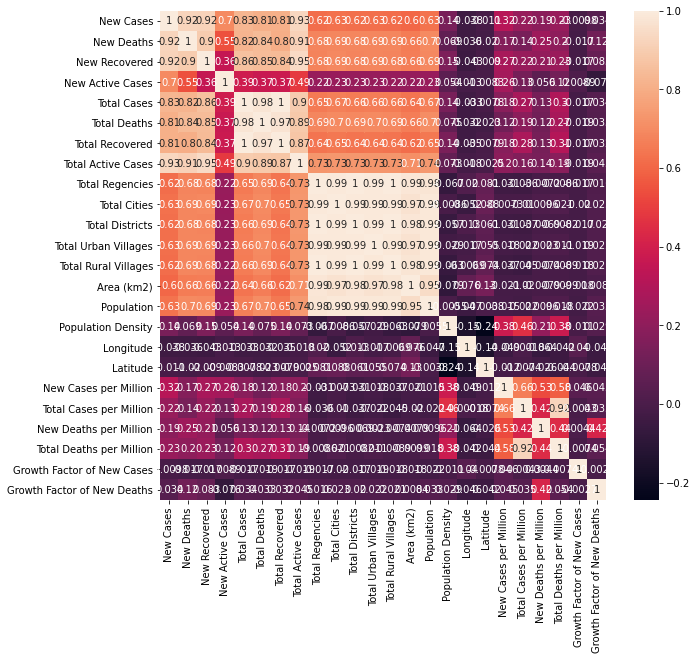

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
corr_matrix = data.corr()
corr_matrix

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.923413,0.919865,0.695185,0.827997,0.807272,0.805727,0.933459,0.618121,0.629706,0.622613,0.625797,0.618959,0.602532,0.632065,0.137188,-0.038393,-0.010695,0.315949,0.223450,0.189597,0.231301,-0.009756,0.033801
New Deaths,0.923413,1.000000,0.897754,0.545669,0.824963,0.843342,0.803482,0.912796,0.680229,0.687717,0.684855,0.687076,0.685291,0.657058,0.696282,0.069342,-0.036186,-0.020363,0.173185,0.139719,0.246364,0.200739,-0.016819,0.119978
New Recovered,0.919865,0.897754,1.000000,0.357649,0.861992,0.845108,0.841516,0.946255,0.678694,0.691451,0.683334,0.687247,0.679282,0.661670,0.693295,0.151009,-0.042981,-0.009048,0.271253,0.223854,0.214072,0.234823,-0.017380,0.083095
New Active Cases,0.695185,0.545669,0.357649,1.000000,0.390104,0.369550,0.374659,0.487095,0.223634,0.228066,0.225807,0.226278,0.224297,0.218176,0.229922,0.053724,-0.012747,-0.008254,0.261716,0.126029,0.055698,0.121548,0.008917,-0.075998
Total Cases,0.827997,0.824963,0.861992,0.390104,1.000000,0.976977,0.998731,0.897651,0.654473,0.665496,0.658514,0.662186,0.655062,0.638149,0.666838,0.135452,-0.033317,-0.007843,0.184864,0.273385,0.133745,0.297951,-0.017451,0.033873
Total Deaths,0.807272,0.843342,0.845108,0.369550,0.976977,1.000000,0.973320,0.885860,0.688026,0.695996,0.692633,0.695545,0.693327,0.663925,0.704165,0.074936,-0.031581,-0.022770,0.118849,0.189370,0.117646,0.273663,-0.018985,0.032664
Total Recovered,0.805727,0.803482,0.841516,0.374659,0.998731,0.973320,1.000000,0.874513,0.636417,0.647982,0.640278,0.644432,0.636662,0.620548,0.648605,0.142470,-0.034602,-0.007866,0.183036,0.284770,0.132093,0.307283,-0.017018,0.032253
Total Active Cases,0.933459,0.912796,0.946255,0.487095,0.897651,0.885860,0.874513,1.000000,0.727908,0.733618,0.732918,0.732054,0.730185,0.711658,0.739310,0.073368,-0.018316,-0.002519,0.197475,0.162255,0.136951,0.185505,-0.018797,0.044622
Total Regencies,0.618121,0.680229,0.678694,0.223634,0.654473,0.688026,0.636417,0.727908,1.000000,0.991351,0.998129,0.993260,0.996365,0.985316,0.980077,-0.066520,0.020065,0.081162,-0.030618,-0.036485,-0.007190,-0.008595,-0.016883,0.015836
Total Cities,0.629706,0.687717,0.691451,0.228066,0.665496,0.695996,0.647982,0.733618,0.991351,1.000000,0.993252,0.993656,0.991045,0.968680,0.988254,-0.008628,-0.052144,0.088252,-0.007286,-0.009960,0.009635,0.021055,-0.019851,0.022501


In [ ]:
del data['Population Density']
del data['Longitude']
del data['Latitude']
del data['New Cases per Million']
del data['Total Cases per Million']
del data['New Deaths per Million']
del data['Total Deaths per Million']
del data['Growth Factor of New Cases']
del data['Growth Factor of New Deaths']

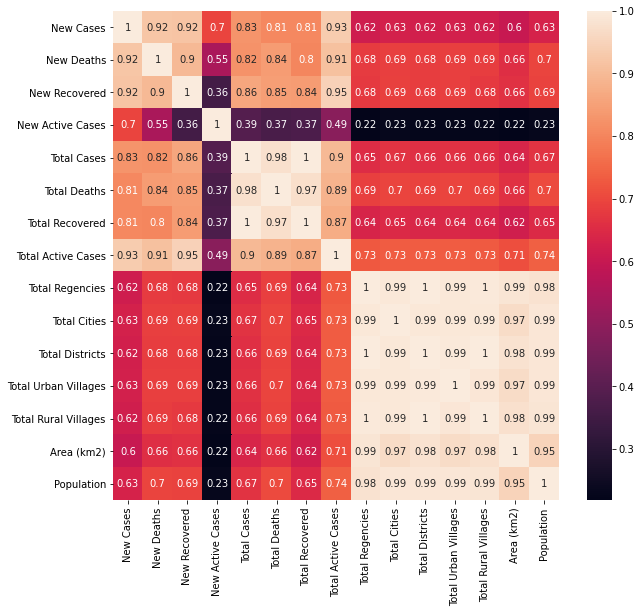

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
del data['New Active Cases']
del data['Total Regencies']
del data['Total Cities']
del data['Total Districts']
del data['Total Urban Villages']
del data['Total Rural Villages']
del data['Area (km2)']
del data['Population']

In [ ]:
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Case Fatality Rate,Case Recovered Rate
0,2020-01-08,ID-JI,Jawa Timur,9,3,1,9,5,10,-6,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,55.56%,111.11%
1,2020-01-09,ID-JI,Jawa Timur,0,1,23,9,6,33,-30,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,66.67%,366.67%
2,2020-01-10,ID-JI,Jawa Timur,0,1,14,9,7,47,-45,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,77.78%,522.22%
3,2020-01-11,ID-JI,Jawa Timur,0,3,8,9,10,55,-56,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,111.11%,611.11%
4,2020-01-12,ID-JI,Jawa Timur,0,3,1,9,13,56,-60,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,144.44%,622.22%


In [ ]:
data.describe()

,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Active Cases
count,16283.000000,16283.000000,16283.000000,1.628300e+04,16283.000000,1.628300e+04,16283.000000
mean,301.271879,7.919364,248.015783,4.274674e+04,1243.917644,3.689427e+04,4608.549714
std,1330.028199,32.171434,997.784905,1.784936e+05,4944.634529,1.580017e+05,17670.075450
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,-2395.000000
25%,6.000000,0.000000,2.000000,7.265000e+02,23.000000,3.860000e+02,162.500000
50%,39.000000,1.000000,24.000000,5.941000e+03,149.000000,4.484000e+03,851.000000
75%,127.000000,4.000000,106.000000,1.777450e+04,556.000000,1.430450e+04,2271.000000
max,38391.000000,1040.000000,28975.000000,2.455912e+06,64631.000000,2.023548e+06,367733.000000


# **Visualization**

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

Visualization of Covid 19 Cases in Indonesia

In [ ]:
columns = ['Date', 'Location ISO Code','New Cases','New Deaths','New Recovered','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
data_all = data[data['Location ISO Code']== 'IDN']
data_all = data_all[columns]

In [ ]:
data_all.head()

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Active Cases
56,2020-03-02,IDN,2,0,0,2,0,0,2
61,2020-03-03,IDN,0,0,0,2,0,0,2
66,2020-03-04,IDN,0,0,0,2,0,0,2
71,2020-03-05,IDN,0,0,0,2,0,0,2
77,2020-03-06,IDN,2,0,0,4,0,0,4


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_all['Date'],
                         y=data_all['Total Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.add_trace(go.Scatter(x=data_all['Date'],
                         y=data_all['Total Active Cases'],
                         mode='lines',
                         name= 'Total Active Cases',
                         marker_color= 'red'
                         ))

fig.add_trace(go.Scatter(x=data_all['Date'],
                         y=data_all['Total Deaths'],
                         mode='lines',
                         name='Total Death Cases',
                         marker_color='orange',
                        ))

fig.add_trace(go.Scatter(x=data_all['Date'],
                         y=data_all['Total Recovered'],
                         mode='lines',
                         name='Total Recovered Case',
                         marker_color='green'
                        ))

fig.update_layout(title='Indonesia Covid-19 Case',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total'
                 )
fig.show()

Visualization of Covid-19 Cases in each Provinces

[Text(0, 0.5, 'No. of Total Cases'), Text(0.5, 0, 'Province')]

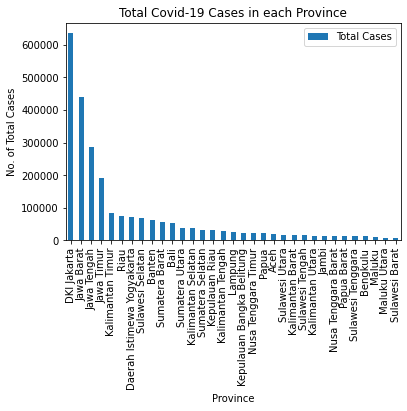

In [ ]:
data[data['Location']!='Indonesia'].sort_values('Total Cases', ascending = False).drop_duplicates(subset = 'Location', keep = 'first').plot(kind='bar', y = 'Total Cases', x='Location', title = 'Total Covid-19 Cases in each Province').set(xlabel='Province',ylabel='No. of Total Cases')

[Text(0, 0.5, 'No. of Total Active Cases'), Text(0.5, 0, 'Province')]

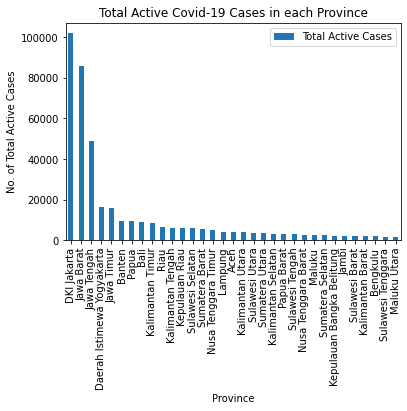

In [ ]:
data[data['Location']!='Indonesia'].sort_values('Total Active Cases', ascending = False).drop_duplicates(subset = 'Location', keep = 'first').plot(kind='bar', y = 'Total Active Cases', x='Location', title = 'Total Active Covid-19 Cases in each Province').set(xlabel='Province',ylabel='No. of Total Active Cases')

[Text(0, 0.5, 'No. of Total Deaths Cases'), Text(0.5, 0, 'Province')]

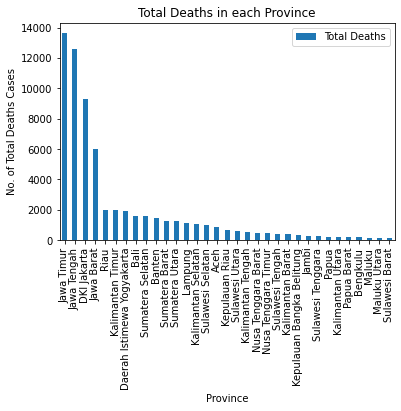

In [ ]:
data[data['Location']!='Indonesia'].sort_values('Total Deaths', ascending = False).drop_duplicates(subset = 'Location', keep = 'first').plot(kind='bar', y = 'Total Deaths', x='Location', title = 'Total Deaths in each Province').set(xlabel='Province',ylabel='No. of Total Deaths Cases')

[Text(0, 0.5, 'No. of Total Recovered Cases'), Text(0.5, 0, 'Province')]

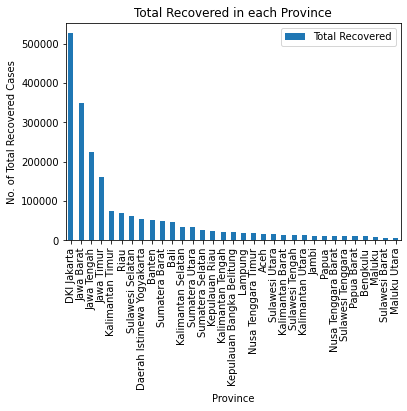

In [ ]:
data[data['Location']!='Indonesia'].sort_values('Total Recovered', ascending = False).drop_duplicates(subset = 'Location', keep = 'first').plot(kind='bar', y = 'Total Recovered', x='Location', title = 'Total Recovered in each Province').set(xlabel='Province',ylabel='No. of Total Recovered Cases')

[Text(0, 0.5, 'No. of New Active Cases'), Text(0.5, 0, 'Province')]

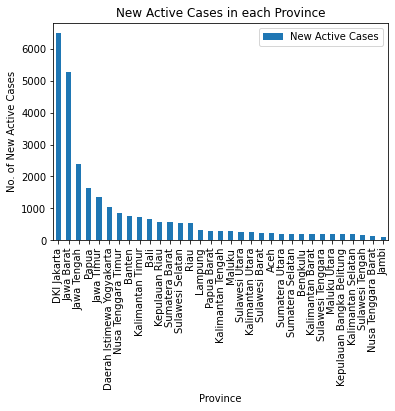

In [ ]:
data[data['Location']!='Indonesia'].sort_values('New Active Cases', ascending = False).drop_duplicates(subset = 'Location', keep = 'first').plot(kind='bar', y = 'New Active Cases', x='Location', title = 'New Active Cases in each Province').set(xlabel='Province',ylabel='No. of New Active Cases')

[Text(0, 0.5, 'No. of New Death'), Text(0.5, 0, 'Province')]

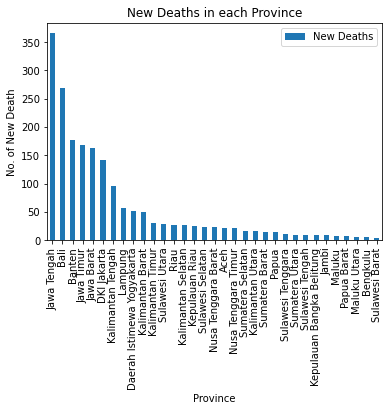

In [ ]:
data[data['Location']!='Indonesia'].sort_values('New Deaths', ascending = False).drop_duplicates(subset = 'Location', keep = 'first').plot(kind='bar', y = 'New Deaths', x='Location', title = 'New Deaths in each Province').set(xlabel='Province',ylabel='No. of New Death')

[Text(0, 0.5, 'No. of New Recovered Cases'), Text(0.5, 0, 'Province')]

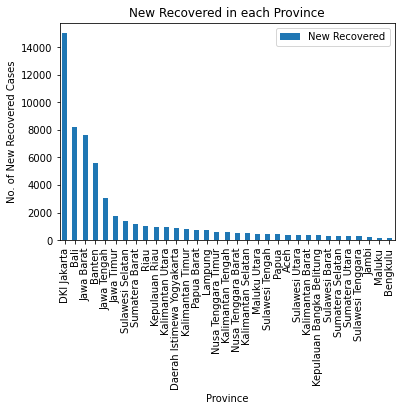

In [ ]:
data[data['Location']!='Indonesia'].sort_values('New Recovered', ascending = False).drop_duplicates(subset = 'Location', keep = 'first').plot(kind='bar', y = 'New Recovered', x='Location', title = 'New Recovered in each Province').set(xlabel='Province',ylabel='No. of New Recovered Cases')

[Text(0, 0.5, 'No. of People'), Text(0.5, 0, 'Date')]

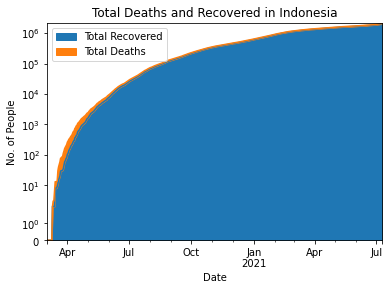

In [ ]:
drplot = data[data['Location']=='Indonesia'].plot(kind='area', x = 'Date', y = ['Total Recovered', 'Total Deaths'], title = 'Total Deaths and Recovered in Indonesia')
drplot.set_yscale('symlog')
drplot.set(xlabel = 'Date', ylabel = 'No. of People')

# **Modelling the Data**

Target = New Cases

Splitting Data

In [ ]:
X = data[['New Deaths','New Recovered','Total Cases','Total Deaths','Total Recovered','Total Active Cases']]
y = data[['New Cases']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

In [ ]:
with open('trainfile.csv', 'w') as FOUT:
    np.savetxt(FOUT, X_train)

In [ ]:
with open('testfile.csv', 'w') as FOUT:
    np.savetxt(FOUT, X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtcla = DecisionTreeClassifier(random_state=None)

dtcla.fit(X_train, y_train)

y_predict = dtcla.predict(X_test)

In [ ]:
X_test

array([[-0.16899967, -0.19662544, -0.18168478, -0.19901248, -0.17950618,
        -0.17457248],
       [-0.12850002, -0.05838265, -0.14852395, -0.12485972, -0.15418259,
        -0.08647225],
       [-0.21714076, -0.25049947, -0.23893051, -0.25154577, -0.23307605,
        -0.25931704],
       ...,
       [-0.11474542, -0.22203771, -0.16465897, -0.18769762, -0.15857927,
        -0.19305703],
       [-0.22096148, -0.21695526, -0.04287876, -0.04282696, -0.02299715,
        -0.21648976],
       [-0.21561247, -0.22508719, -0.17395902, -0.21416632, -0.16407669,
        -0.23059489]])

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lnr = LinearRegression(normalize=True,)
lnr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
pred = lnr.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
test_pred = lnr.predict(X_test)
train_pred = lnr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.362379448896566
MSE: 119.5007562624348
RMSE: 10.931640145121628
R2 Square 0.8947895874562023
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.2233642532462228
MSE: 93.33512449431824
RMSE: 9.661010531736224
R2 Square 0.9067862583502546
__________________________________


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.362379,119.500756,10.93164,0.89479,0.795861


In [ ]:
data=X_test
data

array([[-0.16899967, -0.19662544, -0.18168478, -0.19901248, -0.17950618,
        -0.17457248],
       [-0.12850002, -0.05838265, -0.14852395, -0.12485972, -0.15418259,
        -0.08647225],
       [-0.21714076, -0.25049947, -0.23893051, -0.25154577, -0.23307605,
        -0.25931704],
       ...,
       [-0.11474542, -0.22203771, -0.16465897, -0.18769762, -0.15857927,
        -0.19305703],
       [-0.22096148, -0.21695526, -0.04287876, -0.04282696, -0.02299715,
        -0.21648976],
       [-0.21561247, -0.22508719, -0.17395902, -0.21416632, -0.16407669,
        -0.23059489]])

In [ ]:
submission = pd.DataFrame({'New_Cases':y_predict})
                       
submission.head(20)

,New_Cases
0,2
1,7
2,0
3,25
4,15
5,5
6,87
7,0
8,0
9,1


In [ ]:
submission['Day'] = np.arange(len(submission))

In [ ]:
submission.head(20)

,New_Cases,Day
0,2,0
1,7,1
2,0,2
3,25,3
4,15,4
5,5,5
6,87,6
7,0,7
8,0,8
9,1,9


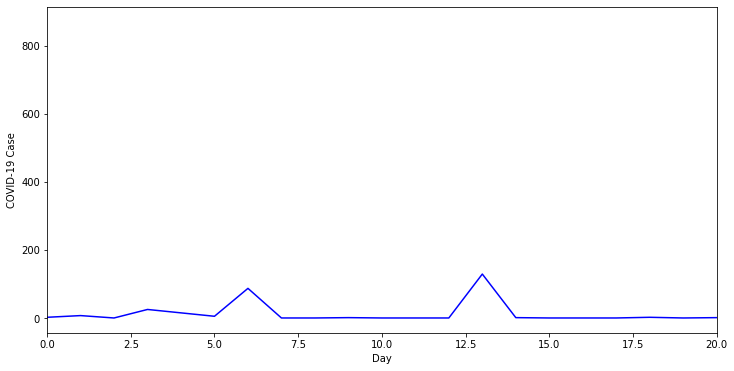

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

x = submission['Day']
y = submission['New_Cases']

ax.plot(y, color='blue')

plt.xlim([0,20])
plt.xlabel("Day")
plt.ylabel("COVID-19 Case")
plt.show()

SVM

In [ ]:
from sklearn.svm import SVR

svr = SVR(C=10, kernel='linear')
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_pred = svr.predict(X_test)

In [ ]:
svr_test_pred = svr.predict(X_test)
svr_train_pred = svr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, svr_test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, svr_train_pred)

Test set evaluation:
_____________________________________
MAE: 3.217866771894616
MSE: 123.60130665920052
RMSE: 11.117612453184385
R2 Square 0.891179396086761
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.083232511118918
MSE: 97.85396892871078
RMSE: 9.89211650400008
R2 Square 0.902273290697991
__________________________________


In [ ]:
results_df_2 = pd.DataFrame(data=[["SVR", *evaluate(y_test, svr_test_pred) , cross_val(SVR())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

ValueError: ignored

In [ ]:
data=X_test
data

array([[-0.16899967, -0.19662544, -0.18168478, -0.19901248, -0.17950618,
        -0.17457248],
       [-0.12850002, -0.05838265, -0.14852395, -0.12485972, -0.15418259,
        -0.08647225],
       [-0.21714076, -0.25049947, -0.23893051, -0.25154577, -0.23307605,
        -0.25931704],
       ...,
       [-0.11474542, -0.22203771, -0.16465897, -0.18769762, -0.15857927,
        -0.19305703],
       [-0.22096148, -0.21695526, -0.04287876, -0.04282696, -0.02299715,
        -0.21648976],
       [-0.21561247, -0.22508719, -0.17395902, -0.21416632, -0.16407669,
        -0.23059489]])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

test_pred = dt_reg.predict(X_test)
train_pred = dt_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.4296487349545566
MSE: 144.48784328174895
RMSE: 12.020309616717405
R2 Square 0.8727905489915712
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0011573315864177312
MSE: 0.0007424391309094879
RMSE: 0.027247736252934626
R2 Square 0.9999992585264152
__________________________________


In [ ]:
results_df_2 = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.362379,119.500756,10.931640,0.894790,0.795861
1,SVR,3.217867,123.601307,11.117612,0.891179,0.427456
2,Decision Tree,3.493982,148.742815,12.196016,0.869044,0.293048
3,Decision Tree,3.429649,144.487843,12.020310,0.872791,0.555581
4,Decision Tree,3.429649,144.487843,12.020310,0.872791,0.597777
